# Varyans Analizi

- İki ya da daha fazla grup ortalaması arasında istatistiksel olarak anlamlı farklılık olup olmadığı öğrenilmek istenildiğinde kullanılır.

- Gruplar arası istatistiksel anlamlılığın değerlendirilmesi demektir.
- Varyans analizi ikiden fazla grup olduğunda kullanacak olduğumuz bir hipotez testi yaklaşımıdır.
- İkiden fazla grup olduğunda bu grupların arasındaki farklılığı değerlendirmek adına varyans analizini kullanacağız.

## Varyans Analizi: Hipotezler

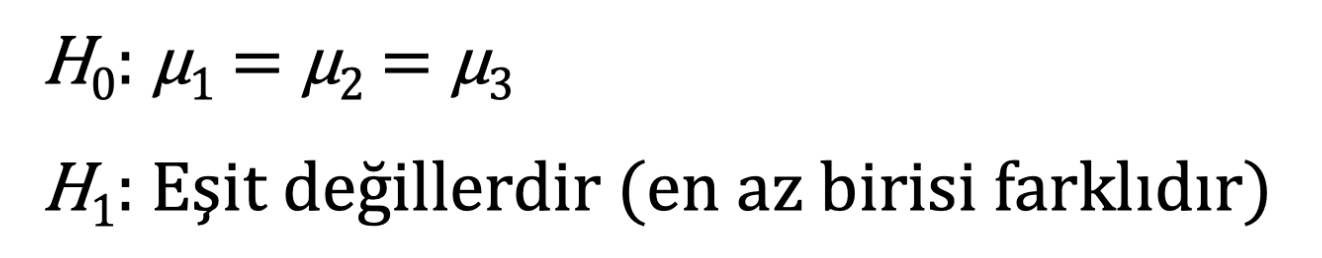

## Varyans Analizi: Test İstatistiği

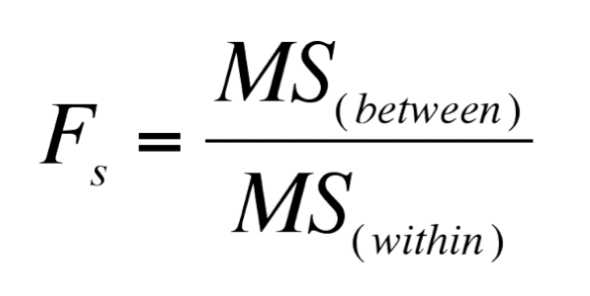

- Varyans analizinde test istatistiğimiz "F istatistiği" olarak geçmektedir.
- Bu gruplar arası ortalama hata ya da değişkenlik diyebileceğimiz ifade ve grup içi ortalama hata ifadelerinin birbirine bölünmesiyle oluşturulur.
- Test istatistiklerini, p-value üzerinden değerlendireceğiz.

## Varyans Analizi: Varsayımlar

- Gözlemlerin birbirinden bağımsız olması (grupların)
- Normal dağılım
- Varyans homojenliği

buradaki varyans homojenliği varsayımı hassas ve mutlaka karşılanması gereken varsayımlardan birisidir. karşılanmadığı durumlarda alternatif yollar vardır.

# İş Uygulaması: Ana Sayfa İçerik Stratejisi Belirlemek

Bir web sitesinin başarı metriklerinden, değerlendirmelerinden
birisi ortalama ziyaret süresini artırmaktır. bunun yüksek olmasıdır ve hemen çıkış oranı gibi bazı istatistiklerinde düşük olmasıdır.

ikincisi ilgili web sitelerinin ana sayfada geçirilen süreyi artırmak istemesi sebeplerinden birisi, insanlar eğer web sitesinde uzun zaman geçirirlerse hem reklamlara tıklama hemde markaya olan bağımlılıklarının artma durumlarının daha olası olduğu biliniyor.

yani marka bağımlılığı ve reklamların tıklanması, ürünlerin satılması gibi amaçlarla ana sayfada insanların veya web sitesinde insanların tutulması çabası var.

bir web sitemiz var. bu e-ticaret olabilir, haber sitesi olabilir...

amacımız insanların web sitesinde geçirdiği süreyi artırmak.

bir haber sitesi için bu stratejiyi nasıl belirleyebileceğinizi değerlendirmiş olacağız.

3 tarz haber var. Bu haberin hangisine odaklanılması gerektiğine karar verilmek isteniyor. A, B ve C grupları. 2den fazla grubumuz var.

- **Problem**:
Ana Sayfa'da geçirilen süre artırılmak isteniyor.

- **Detaylar**:
    - Bir web sitesi için başarı kriterleri: ortalama ziyaret süresi, hemen çıkış oranı vb.
    - Uzun zaman geçiren kullanıcıların reklamlara daha fazla tıkladığı ve markaya olan bağlılıklarının arttığı biliniyor.
    - Buna yönelik olarak benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test gruplarına gösteriliyor.
    - A: Doğal Şekilde, B: Yönlendirici, C: İlgi Çekici

- 3 tane farklı haber stratejimiz var. bunları kullanılan başlıklar olarakta düşünebiliriz, kullanılan görseller ya da komple bir konsept olarak düşünebiliriz. örneğin web sitemize gelen 1 milyon kullanıcı 3 gruba ayrılıyor. 3 grubada tamamen birbirinden farklı içerik tarzları gösteriliyor.

# Varyans Analizi

- H0: M1 = M2 = M3 (grup ortalamaları arasında istatistiksel anlamda farklılık yoktur)
- H1: Fark vardır.

In [5]:
import pandas as pd

In [6]:
# Doğal şekilde sunulan haber için web sitesinde geçirilen süreler
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

# Yönlendirici
B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

# İlgi Çekici
C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

In [7]:
dfs=[A,B,C]

In [8]:
ABC=pd.concat(dfs, axis=1) # yan yana birleştirir
ABC.columns=["GRUP_A","GRUP_B","GRUP_C"] # sütunları isimlendirdim
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


# Varsayım Kontrolü

- **Grupların Bağımsızlığı**: Bu örnekte gruplar birbirinden bağımsızdır.
- **Normallik Varsayımı**: shapiro testini kullanırız. H0 hipotezini reddedmediğimizde normallik varsayımı sağlanıyor.
- **Varyans Homojenliği**: levene testi ile gerçekleştiriyorduk.

# Normallik Varsayımı

- H0: örnek dağılımı ile teorik dağılımı arasında istatistiksel olarak anlamlı bir dağılım yoktur.

In [13]:
from scipy.stats import shapiro

In [14]:
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.9697431921958923, pvalue=0.5321715474128723)

- pvalue < 0.05 olmadığından H0 hipotezini reddedemiyoruz. yani normallik varsayımı sağlanmaktadır.

In [15]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

- pvalue < 0.05 olmadığından H0 hipotezini reddedemiyoruz. yani normallik varsayımı sağlanmaktadır.

In [16]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

- pvalue < 0.05 olmadığından H0 hipotezini reddedemiyoruz. yani normallik varsayımı sağlanmaktadır.

# Varyans Homojenliği

In [20]:
import scipy.stats as stats

In [21]:
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

- H0: Varyanslar homojendir.
- pvalue < 0.05 sağlanmamaktadır. Bu yüzden H0 hipotezi reddedilmez.
- yani varyanslar homojendir. Varyans homojenliği varsayımı sağlanmıştır.

# Hipotez Testinin Uygulanması

çalışmanın başında kabul edilen kabul edilebilir hata miktarı olan alfa, 0.05'dır.

In [23]:
from scipy.stats import f_oneway

In [24]:
# f_oneway fonksiyonu ile testi gerçekleştiriyoruz
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [25]:
print('{:.10f}'.format(f_oneway(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])[1]))

0.0000000000


- medya şirketinde oluşturulan haber portalında 3 farklı haber tarzı deniyorlar. bu haber tarzları A, B ve C 'dir.
- H0: Bu 3 gruba ilişkin web sitesinde geçirilen süre ortalamaları arasında istatistiksel olarak anlamlı bir farklılık yoktur.
- pvalue < 0.05 sağlanır. yani H0 hipotezi reddedilir. gruplar arasında istatistiksel olarak anlamlı bir farklılık vardır.
- farklılığını bildiğimiz grubun lehine olacak şekilde seçme işlemini gerçekleştirebiliriz.

In [27]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


- GRUP_C yani 3. tarz olan "İlgi Çekici" habercilik
- Gözlemlendiği üzere C'nin istatiksel olarak diğer gruplara göre daha anlamlı katkılar sağlayabileceği gözlemlenmektedir.

# Nonparametrik Hipotez Testi

Varsayalım ki önceki bölümde incelemiş olduğumuz varsayımlarımız sağlanmadı. normallik ve varyans homojenliği varsayımı

işte bu varsayımlar sağlanmadığında kullanacak olduğumuz test **kruskal** testidir.

In [28]:
from scipy.stats import kruskal

In [29]:
kruskal(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

In [30]:
print('{:.10f}'.format(kruskal(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])[1]))

0.0000000000


- H1: en az birinde farklılık vardır yani farklılık vardır.
- H0: Bu 3 gruba ilişkin web sitesinde geçirilen süre ortalamaları arasında istatistiksel olarak anlamlı bir farklılık yoktur.

- pvalue < 0.05 sağlandığından H0 hipotezi reddedilir. H1 kabul edilir.
- pvalue < 0.05 sağlanır. yani H0 hipotezi reddedilir. gruplar arasında istatistiksel olarak anlamlı bir farklılık vardır.